In [16]:
import numpy as np
import pandas as pd
import pickle
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

In [4]:
f = open('../data/processed/Saledates_Residuals.pickle', 'rb')
df = pickle.load(f)
f.close()

In [5]:
df.head()

,SALEDATE,RESIDUAL
0,2005-01-12,0.805756
1,2017-04-14,-0.024562
2,2006-08-17,0.094127
3,2017-10-27,-0.555829
4,2011-11-10,-0.418629


In [7]:
df['month'] = pd.to_datetime(df.SALEDATE).map(lambda x: x.month)
df['year'] = pd.to_datetime(df.SALEDATE).map(lambda x: x.year)
df['month_index'] = (df.year - min(df.year))*12 + df.month

In [9]:
min(df['month_index'])  # Period starts in August

8

In [18]:
min(df['year'])

1985

In [19]:
df['year'].sort_values().head()

2710    1985
2851    1991
6126    1992
514     1992
4062    1992
Name: year, dtype: int64

In [21]:
df.drop(2710, inplace=True)

In [22]:
df.drop(2851, inplace=True)

In [23]:
df['year'].sort_values().head()

8659    1992
3312    1992
9158    1992
9157    1992
5783    1992
Name: year, dtype: int64

In [24]:
min(df['month_index'])

85

In [25]:
df['month_index'] = (df.year - min(df.year))*12 + df.month

In [26]:
min(df['month_index'])

1

In [27]:
df.head()

,SALEDATE,RESIDUAL,month,year,month_index
0,2005-01-12,0.805756,1,2005,157
1,2017-04-14,-0.024562,4,2017,304
2,2006-08-17,0.094127,8,2006,176
3,2017-10-27,-0.555829,10,2017,310
4,2011-11-10,-0.418629,11,2011,239


In [28]:
len(df)

10883

In [29]:
ts = df.groupby('month_index')['RESIDUAL'].mean()

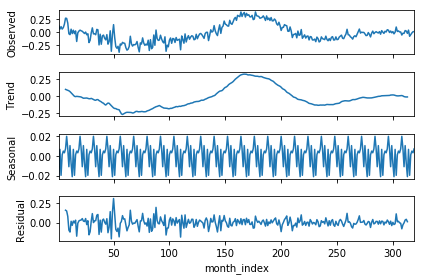

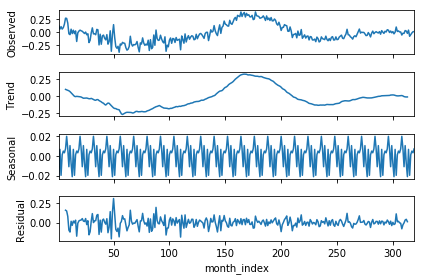

In [30]:
seasonal_decompose(ts, freq=12).plot()

In [32]:
f = open("../data/processed/time_series.pickle","wb")
pickle.dump(ts,f)
f.close()